<a href="https://colab.research.google.com/github/yohanesnuwara/bsc-thesis-carbon-capture-storage/blob/master/main/04_fluid_property_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fluid Property Modelling**

In this notebook, we would like to understand how fluid property behaves with CO2 injection (in a system of mixed brine-CO2). Modelling fluid properties is very important for rock physics. 

The fluid properties are:
*   Incompressibility / bulk modulus (`Kf`)
*   Density (`rhof`)

Another property, shear modulus (`Gf`) is zero, because of fluid. From these properties, seismic properties are calculated:

* P-velocity (`Vp`)
* S-velocity (`Vs`)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

We will use our own `Batzle_and_Wang` function from our own Github repo to model the brine. Then, we use `CoolProp` library from `CoolProp` Github repo to model the CO2. 

First, clone our repo and import the function `Batzle_and_Wang`

In [2]:
!git clone https://github.com/yohanesnuwara/bsc-thesis-carbon-capture-storage 

Cloning into 'bsc-thesis-carbon-capture-storage'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 246 (delta 46), reused 0 (delta 0), pack-reused 165
Receiving objects: 100% (246/246), 14.29 MiB | 6.45 MiB/s, done.
Resolving deltas: 100% (127/127), done.


In [0]:
import sys
sys.path.append('/content/bsc-thesis-carbon-capture-storage/lib')
from Batzle_and_Wang import *

Then, install `CoolProp`. 

In [0]:
!pip install CoolProp

     |████████████████████████████████| 4.0MB 9.1MB/s 


# Step 1. Modelling of Brine Properties

Let's start with the brine. Inputs for brine calculation are:
* Pressure (`Pp`)
* Temperature (`temp`)
* Salinity (`salinity`)

We will vary each of these inputs to see how the properties of brine (K, rho) and its seismic properties (Vp, Vs) change.

We will calculate both density and bulk modulus with varying pressure from 10 to 100 MPa. Temperature is constant 50<sup>o</sup>C and salinity is 0.05%.


In [0]:
temp1 = 50
salinity1 = 0.05
Pp1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
rhobrine1 = BW_brine_density(temp1, Pp1, salinity1)
Kbrine1 = BW_brine_bulk(temp1, Pp1, salinity1, rhobrine1)

The curve of density change over pressure is visualized.

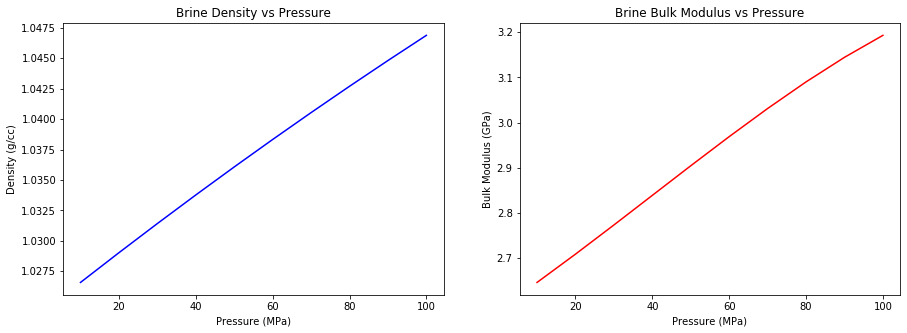

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Brine Density vs Pressure')
plt.xlabel('Pressure (MPa)'), plt.ylabel('Density (g/cc)')
plt.plot(Pp1, rhobrine1, '-', color='blue')
plt.subplot(1,2,2)
plt.title('Brine Bulk Modulus vs Pressure')
plt.xlabel('Pressure (MPa)'), plt.ylabel('Bulk Modulus (GPa)')
plt.plot(Pp1, Kbrine1, '-', color='red')

**Both density and bulk modulus of brine increases as pressure increases**. Let's vary the temperature from 10<sup>o</sup>C to 200<sup>o</sup>C, with constant pressure of 50 MPa and salinity of 0.05%

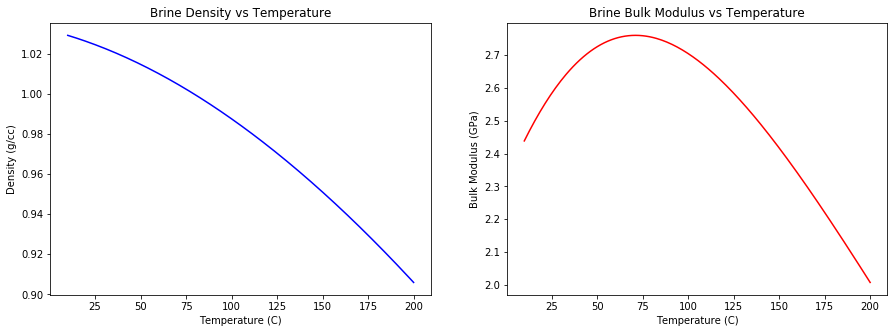

In [43]:
temp2 = np.linspace(10, 200, 200)
Pp2 = 50
salinity2 = 0.01
rhobrine2 = BW_brine_density(temp2, Pp2, salinity2)
Kbrine2 = BW_brine_bulk(temp2, Pp2, salinity2, rhobrine2)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Brine Density vs Temperature')
plt.xlabel('Temperature (C)'), plt.ylabel('Density (g/cc)')
plt.plot(temp2, rhobrine2, '-', color='blue')
plt.subplot(1,2,2)
plt.title('Brine Bulk Modulus vs Temperature')
plt.xlabel('Temperature (C)'), plt.ylabel('Bulk Modulus (GPa)')
plt.plot(temp2, Kbrine2, '-', color='red')

Opposite to the trend of brine density with increasing pressure, **brine density decreases as temperature decreases**. However, the change of brine **bulk modulus has a unique trend (go up then down)**. Now, we vary salinity from 0 (pure water) to 1% (very saline), with constant pressure of 50 MPa and constant temperature of 50<sup>o</sup>C.

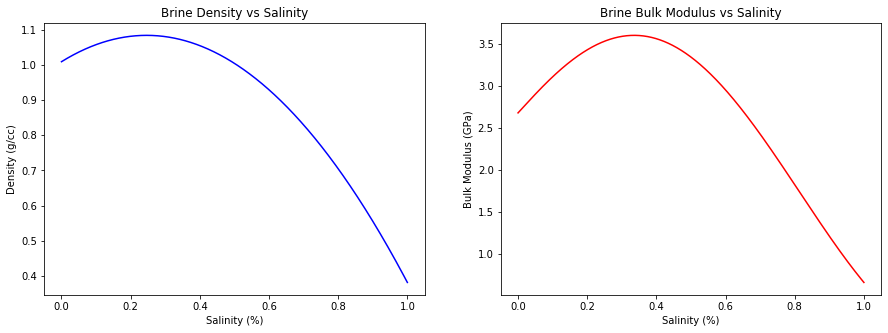